Importing pandas, numpy, seaborn, matplotlib and scikit-learn

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Reading the text file downloaded and changing it to CSV file

In [62]:
file_path = r"E:\guvi\Project_3\household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', low_memory=False)

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


Converting the dataset to dataframe

In [63]:
data_df = pd.DataFrame(df)
data_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


Replacing data types from objects to float

In [64]:
data_df = data_df.replace('?', np.nan)

excluded_cols = ['Date', 'Time']

for col in data_df.columns:
    if col not in excluded_cols and data_df[col].dtype == 'object':
        data_df[col] = (
            data_df[col].replace('?', np.nan)
            .str.replace(',', '', regex=False)
            .astype(float)
        )


In [65]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [150]:
data_df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

data_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [157]:
data_df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
DateTime                     0
dtype: int64

In [158]:
df1 = data_df.dropna()
df1.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
DateTime                 0
dtype: int64

In [159]:
df1["Year"]=pd.DatetimeIndex(df1["DateTime"]).year 
df1["Month"]=pd.DatetimeIndex(df1["DateTime"]).month
df1["Day"]=pd.DatetimeIndex(df1["DateTime"]).day 
df1["Weekday"]=pd.DatetimeIndex(df1["DateTime"]).weekday 
df1["Hour"]=pd.DatetimeIndex(df1["DateTime"]).hour 
df1

C:\Users\krith\AppData\Local\Temp\ipykernel_27720\1760158855.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krith\AppData\Local\Temp\ipykernel_27720\1760158855.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krith\AppData\Local\Temp\ipykernel_27720\1760158855.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Weekday,Hour
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,5,17
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,5,17
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,5,17
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,5,17
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,4,20
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,4,20
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,4,21
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,4,21


Hourly power usage

In [123]:
df3 = df1.resample('h').mean(numeric_only=True).reset_index()
fig = px.line(df3, x='DateTime', y='Global_active_power', title='Hourly Global Active Power Usage')
fig.update_layout(xaxis_title='DateTime', yaxis_title='Global Active Power (kilowatts)')
fig.update_xaxes(tickformat='%Y-%m-%d %H:%M')
fig.show()

In [124]:
df3

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
1,2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2,2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
3,2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
4,2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...,...
34584,2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
34585,2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
34586,2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000
34587,2010-11-26 20:00:00,1.163700,0.061167,239.396000,4.913333,0.0,1.066667,0.000000


Daily power usage

In [125]:
df4 = df1.resample('D').mean(numeric_only=True).reset_index()
fig2 = px.line(df4, x='DateTime', y='Global_active_power', title='Daily Global Active Power Usage')
fig2.update_layout(xaxis_title='DateTime', yaxis_title='Global Active Power (kilowatts)')
fig2.update_xaxes(dtick = "M1", tickformat='%b %Y')
fig2.show()

Daily averages of power consumption

In [ ]:
df2['Daily_Average'] = df2.groupby(df2['DateTime'].dt.date)['Global_active_power'].transform('mean')
df2['Daily_Average']

0      2.505248
1      1.733891
2      1.959281
3      1.484233
4      1.605114
         ...   
202    0.958963
203    1.154565
204    1.335928
205    1.107106
206    1.186756
Name: Daily_Average, Length: 207, dtype: float64

In [126]:
df4

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
4,2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972
...,...,...,...,...,...,...,...,...
1437,2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889
1438,2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417
1439,2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889
1440,2010-11-25,0.993864,0.080644,241.536257,4.169444,0.747222,0.295833,3.522222


Weekly power usage

In [136]:
df5 = df1.resample('W').mean(numeric_only=True).reset_index()
fig3 = px.line(df5, x='DateTime', y='Global_active_power', title='Weekly Global Active Power Usage')
fig3.update_layout(xaxis_title='DateTime', yaxis_title='Global Active Power (kilowatts)')
fig.update_xaxes(tickformat='%Y-%m-%d %H:%M')
fig3.show()

In [128]:
df5

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-17,2.505248,0.142118,239.258088,10.664161,1.107298,2.577887,9.949346
1,2006-12-24,1.733891,0.116684,241.369862,7.340714,1.110119,2.118155,7.683234
2,2006-12-31,1.959281,0.144159,241.909274,8.241865,1.419841,2.249504,6.673810
3,2007-01-07,1.484233,0.133825,240.921636,6.262123,0.581052,1.745933,5.376290
4,2007-01-14,1.605114,0.157792,240.269605,6.831825,1.331349,1.883829,8.271081
...,...,...,...,...,...,...,...,...
202,2010-10-31,0.958963,0.126269,244.880781,3.991687,0.591369,0.965476,5.346825
203,2010-11-07,1.154565,0.134101,242.891289,4.854226,1.124107,1.547619,6.021925
204,2010-11-14,1.335928,0.111409,238.685010,5.674028,1.595536,1.075298,7.740476
205,2010-11-21,1.107106,0.099677,240.721590,4.675179,0.870040,0.953968,6.285317


Weekdays vs Weekends

In [71]:
df2['Weekday_Name'] = df2['DateTime'].dt.day_name()
df2['Day_Type'] = df2['DateTime'].dt.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Weekday')

df2['Hour'] = df2['DateTime'].dt.hour

day_type_hourly = df2.groupby(['Day_Type', 'Hour'])['Global_active_power'].mean().reset_index()


fig = px.line(day_type_hourly, x='Hour', y='Global_active_power', color='Day_Type',
              title='Power Usage Trend: Weekdays vs Weekends',
              labels={'Global_active_power': 'Avg Power (kW)', 'Hour': 'Hour of Day'})
fig.show()

Monthly total power usage

In [72]:
df2['Month'] = df2['DateTime'].dt.month
df2['Year'] = df2['DateTime'].dt.year
df2['YearMonth'] = df2['DateTime'].dt.to_period('M') 

monthly_total = df2.groupby('YearMonth')['Global_active_power'].sum().reset_index()
monthly_total['YearMonth'] = monthly_total['YearMonth'].astype(str)

fig = px.line(monthly_total, x='YearMonth', y='Global_active_power',
              title='Monthly Total Global Active Power',
              labels={'Global_active_power': 'Avg Power (kW)', 'YearMonth': 'Month'})
fig.show()

Monthly average power usage 

In [73]:
monthly_avg = df2.groupby('YearMonth')['Global_active_power'].mean().reset_index()
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].astype(str)

fig = px.line(monthly_avg, x='YearMonth', y='Global_active_power',
              title='Monthly Average Global Active Power',
              labels={'Global_active_power': 'Avg Power (kW)', 'YearMonth': 'Month'})
fig.show()

Correlation matrix and heatmap

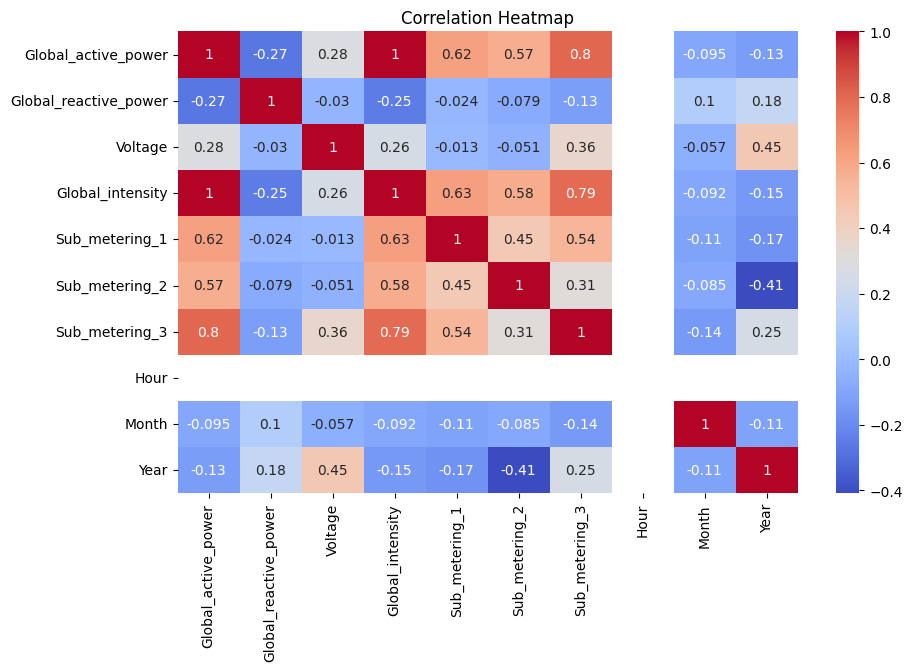

In [74]:
corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Outlier detection to find anomalies

In [75]:
fig = px.box(df2, y='Global_active_power', title='Outliers in Active Power Usage')
fig.show()

Sub-metering Breakdown

In [76]:
fig = px.line(df2[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']],
              title='Energy Usage by Sub-Metering')
fig.show()

Peak hour identification

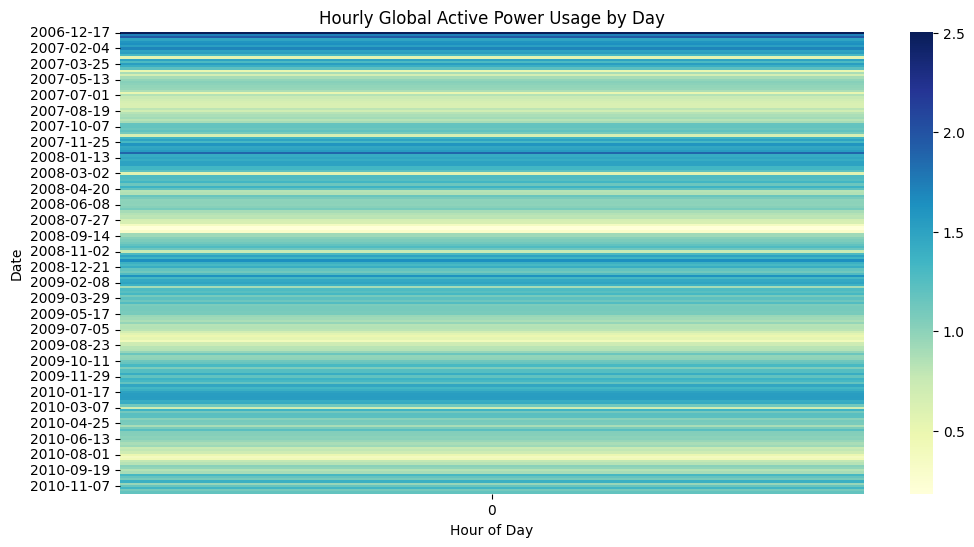

In [101]:
pivot_df = df2.pivot_table(values='Global_active_power', index='Date', columns='Hour', aggfunc='mean')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title('Hourly Global Active Power Usage by Day')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.show()

Rolling averages to smooth trends

In [79]:
df2['Rolling_Avg_6h'] = df2['Global_active_power'].rolling(window=6).mean()

df2['Rolling_Avg_24h'] = df2['Global_active_power'].rolling(window=24).mean()

fig = px.line(df2, y=['Global_active_power', 'Rolling_Avg_24h'], x='DateTime',
              title='Global Power Usage with Rolling Average',
              labels={'value': 'Power (kW)', 'index': 'DateTime'})
fig.show()

In [80]:
df2['Rolling_Avg_6h'] = df2['Rolling_Avg_6h'].fillna(df2['Rolling_Avg_6h'].mean())
df2['Rolling_Avg_24h'] = df2['Rolling_Avg_24h'].fillna(df2['Rolling_Avg_24h'].mean())

df2.isna().sum()

DateTime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Weekday_Name             0
Day_Type                 0
Hour                     0
Month                    0
Year                     0
YearMonth                0
Daily_Average            0
Rolling_Avg_6h           0
Rolling_Avg_24h          0
dtype: int64

Z-Score scalling using sklearn 

In [81]:
scaler = StandardScaler()
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df_scaled = df2.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df2[numeric_cols])
df_scaled[numeric_cols]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.176966,0.712873,-0.843424,4.351840,-0.005258,2.382866,1.805547
1,1.890668,-0.270308,0.292470,1.948623,0.000373,1.529792,0.634234
2,2.558723,0.791797,0.582612,2.600254,0.618642,1.773522,0.112480
3,1.150685,0.392300,0.051375,1.168684,-1.055754,0.839101,-0.558185
4,1.508975,1.318781,-0.299343,1.580641,0.441993,1.094981,0.938082
...,...,...,...,...,...,...,...
202,-0.406209,0.100205,2.180943,-0.473091,-1.035158,-0.609106,-0.573415
203,0.173553,0.402984,1.110824,0.150620,0.028296,0.471112,-0.224468
204,0.711110,-0.474214,-1.151674,0.743426,0.969364,-0.405322,0.663821
205,0.032885,-0.927731,-0.056226,0.021149,-0.478875,-0.630460,-0.088325


Min and max normalization

In [82]:
minmax = MinMaxScaler()
df_normalized = df2.copy()
df_normalized[numeric_cols] = minmax.fit_transform(df2[numeric_cols])
df_normalized[numeric_cols]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1.000000,0.517048,0.386507,1.000000,0.432083,0.831182,0.800781
1,0.667697,0.339834,0.562740,0.660819,0.433184,0.680646,0.595367
2,0.764796,0.531273,0.607755,0.752788,0.554041,0.723655,0.503867
3,0.560144,0.459266,0.525335,0.550741,0.226734,0.558764,0.386252
4,0.612220,0.626260,0.470921,0.608883,0.519511,0.603918,0.648653
...,...,...,...,...,...,...,...
202,0.333857,0.406617,0.855735,0.319027,0.230760,0.303209,0.383581
203,0.418123,0.461192,0.689707,0.407056,0.438642,0.493828,0.444776
204,0.496254,0.303081,0.338682,0.490722,0.622600,0.339170,0.600556
205,0.397677,0.221337,0.508640,0.388782,0.339501,0.299441,0.468652


Standardization vs Normalization

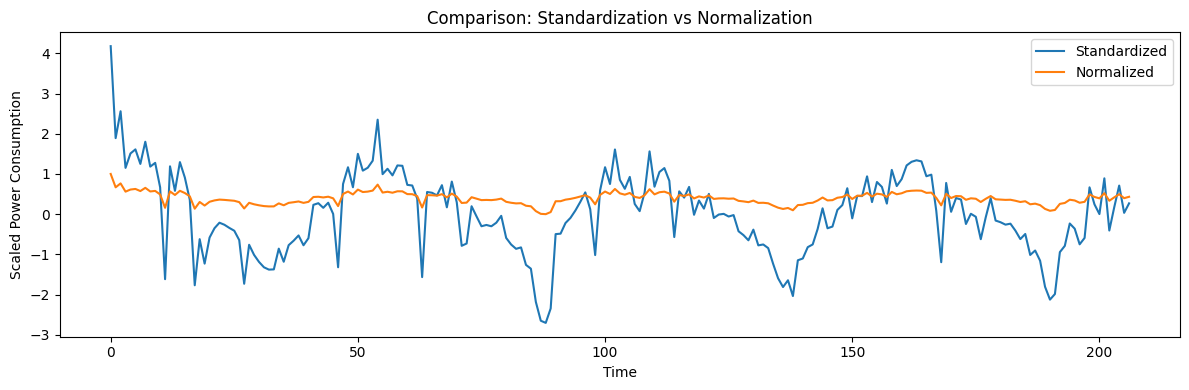

In [83]:
plt.figure(figsize=(12,4))
plt.plot(df_scaled.index, df_scaled['Global_active_power'], label='Standardized')
plt.plot(df_normalized.index, df_normalized['Global_active_power'], label='Normalized')
plt.legend()
plt.title("Comparison: Standardization vs Normalization")
plt.xlabel("Time")
plt.ylabel("Scaled Power Consumption")
plt.tight_layout()
plt.show()

# Simple Linear Regression

Providing independent variable and dependent variable

In [84]:
X = df2[['Global_reactive_power', 'Voltage', 'Global_intensity',
         'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
         'Hour', 'Month', 'Rolling_Avg_6h', 'Rolling_Avg_24h']]

y = df2['Global_active_power']

Spliting the data for training and testing

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting to linear regression model

In [116]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-2.61675140e-01  4.61243168e-03  2.36744221e-01 -1.35402425e-03
  1.48692868e-04  2.66997811e-03 -1.38777878e-17  2.95110324e-04
  9.43032165e-03 -1.11424673e-03]
Intercept: -1.1093086278653164


Feature importance from coefficients

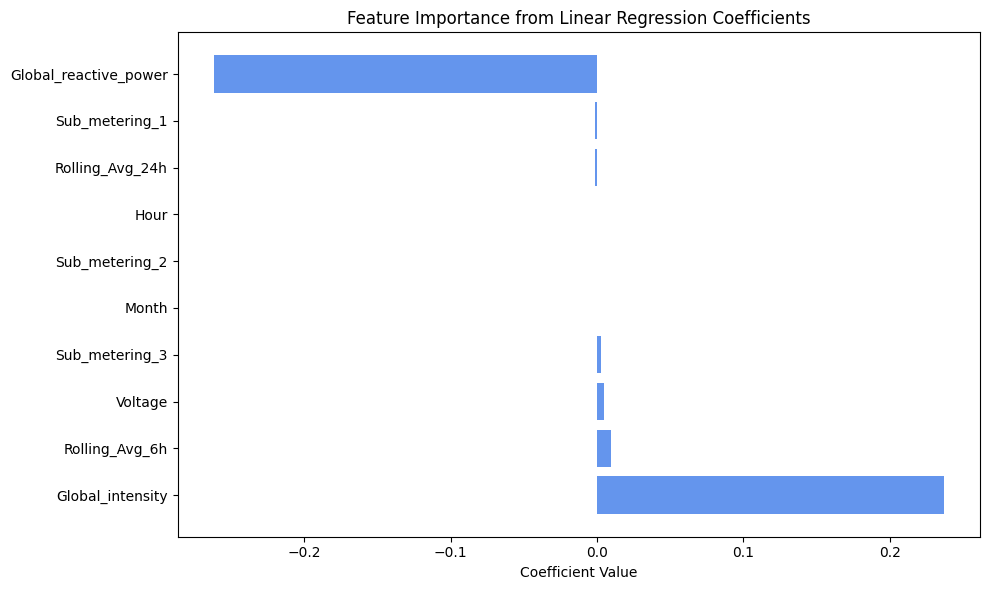

In [88]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'], color='cornflowerblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Linear Regression Coefficients')
plt.tight_layout()
plt.show()

Visualize predictions vs actuals

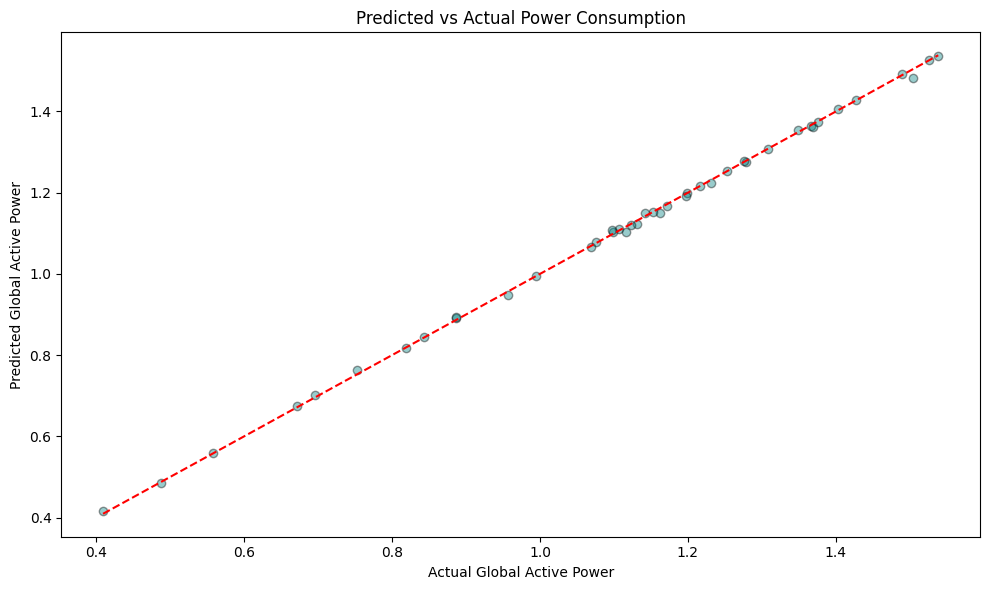

In [119]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.title('Predicted vs Actual Power Consumption')
plt.tight_layout()
plt.show()

Residual prediction of error distribution

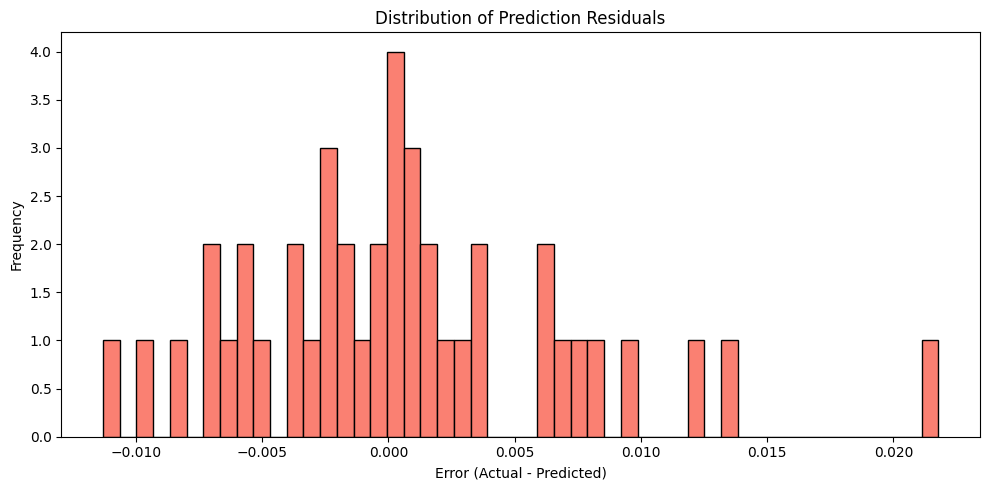

In [89]:
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
plt.hist(residuals, bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Prediction Residuals')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

R-squared, Mean Absolute Error(MAE), Mean Squared Error(MSE) of simple linear regression

In [90]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9994551912554214
MAE: 0.004768606227697663
RMSE: 0.006486283389680225


Using Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest R² Score:", r2_score(y_test, rf_pred))

Random Forest R² Score: 0.9975276346439804
